<div class="alert alert-block alert-danger">
<b>UWAGI PROWADZĄCEGO</b> Jaki krok wybrać - dużo losowych eksperymentów - po ilu iteracjach będziemy kończyć z danym krokiem - dla mnóstwa różnych kroków; minimum, maksimum, mediany; boxplot (kwantyle) - jak się rozkłada tempo zbiegu jako można zagregować wyniki eksperymentów losowych
</div>

Poniżej umieszczone zostały niezbędne importy funkcji z bibliotek, które zostały wykorzystane do realizacji zadania.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# import random - nie wiem, czy się jeszcze przyda

Dla wykresu 3D będziemy również potrzebowali zaimportowania ...

In [79]:
from mpl_toolkits import mplot3d

Definiujemy funkcję f(x) (zgodnie z treścią zawartą w zadaniu) - o nazwie *f_function*. Argumentem na wejście funkcji *f_function* jest dana zmienna niezależna (oznaczona jako *indepedent_variable*) - wartość współrzędnej x (później w kodzie będzie ona oznaczona jako m.in. *x_value*), zaś na wyjściu otrzymuje obliczoną zgodnie z formułą funkcji wartość zmiennej niezależnej - *dependent_variable*.

In [149]:
def f_function(independent_variable):
       dependent_variable = 10*(independent_variable**4) + 3*(independent_variable**3) - 30*(independent_variable**2) + 10*independent_variable
       return dependent_variable

In [148]:
x_values = np.linspace(-3, 2.2)
y_values = [f_function(x) for x in  x_values]

W tej komórce kodu jesteśmy w stanie ustawić rozmiary wykresu, w celu jak najlepszego zwizualizowania danych

In [139]:
# plt.rcParams["figure.figsize"] = (40,20)

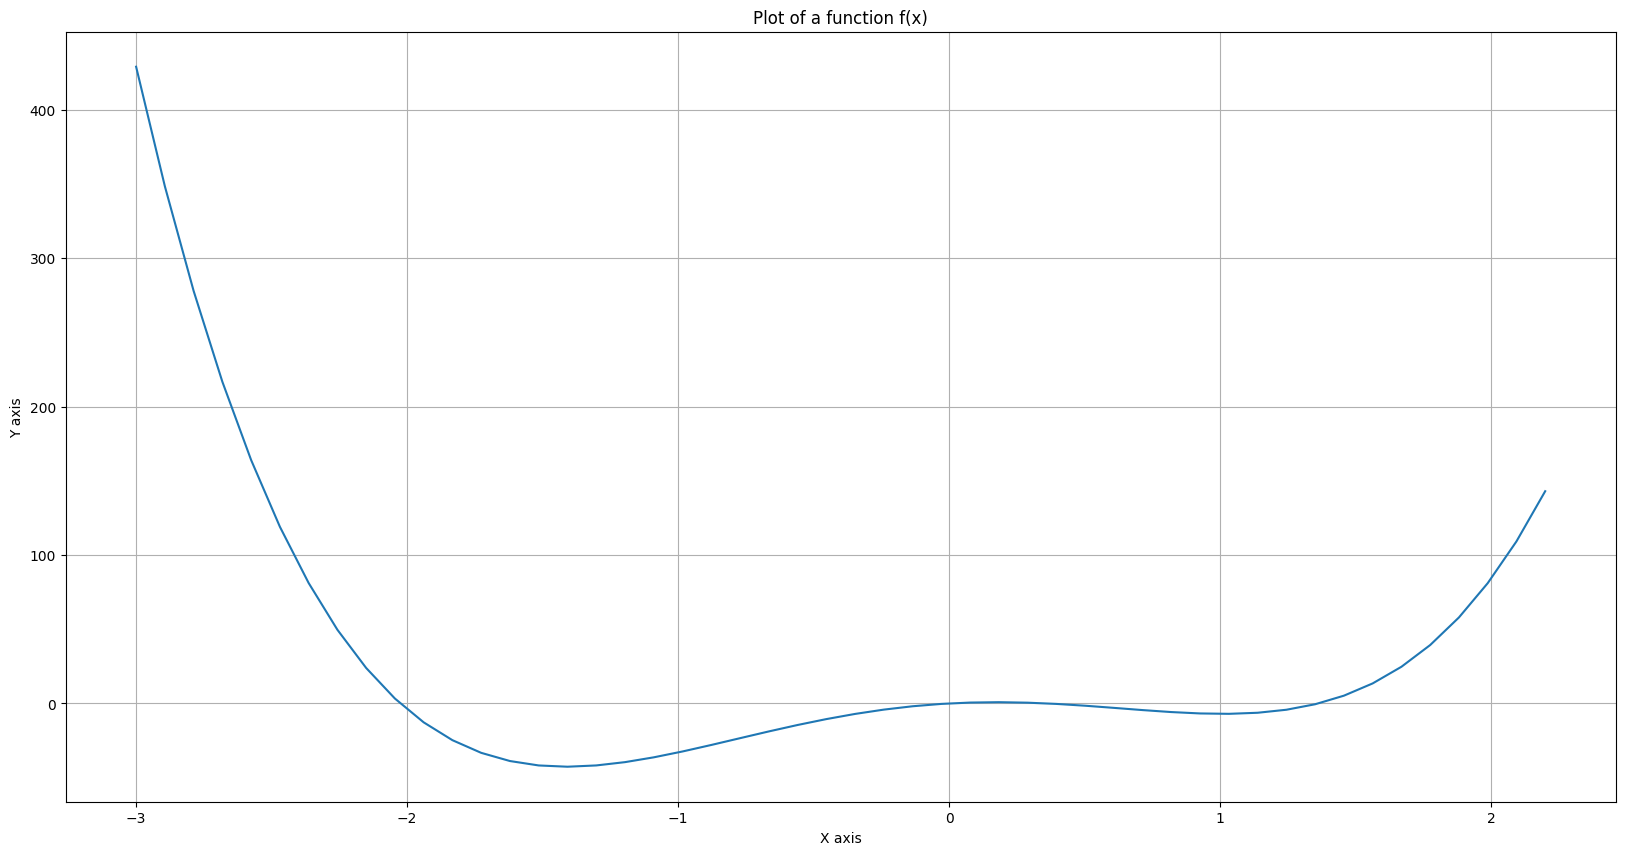

In [150]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)')
ax.grid()


plt.show()

In [83]:
def g_function(first_independent_variable, second_independent_variable):
    dependent_variable = 10*second_independent_variable**4 + 10*first_independent_variable**4 + 3*first_independent_variable**3 - 30*first_independent_variable**2 + 10*first_independent_variable
    return dependent_variable

In [153]:
# plt.rcParams["figure.figsize"] = (20,10)

In [152]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)


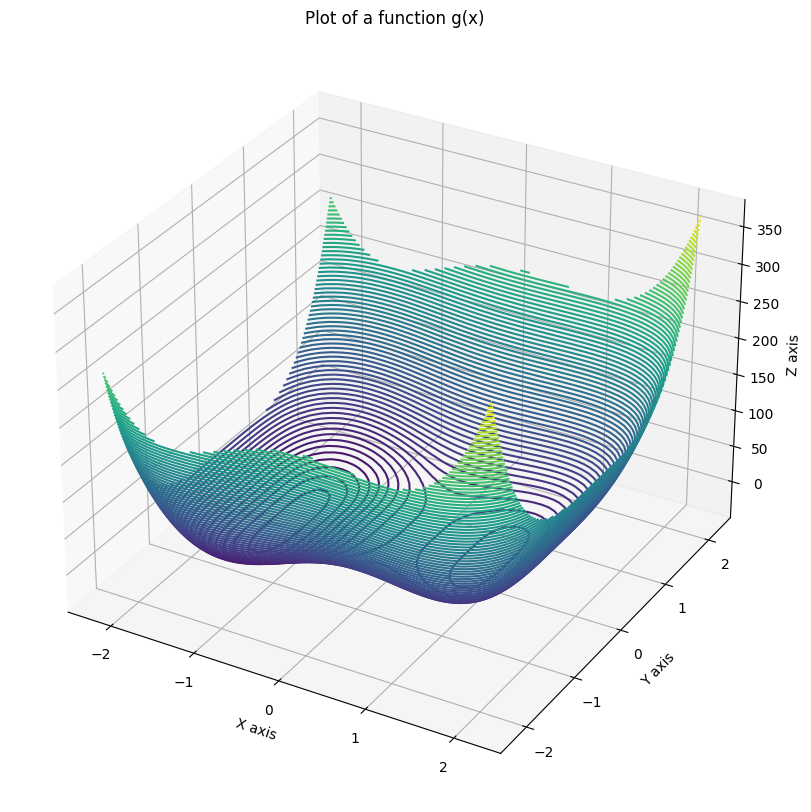

In [154]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 100, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

# ax.view_init(60, 35)

plt.show()

In [67]:
# ax.view_init(60, 35)

# plt.show()

Warunki stopu w zaimplementowanym algorytmie to liczba iteracji (nie może zostać przekroczona podana liczba iteracji funkcji - wówczas funkcja kończy się - nie mamy jednak pewności, czy na wyjściu otrzymany punkt wykresu jest minimum lokalnym/globalnym ) oraz precyzja (algorytm pomyślnie zatrzymuje się, gdy różnica między badanym wcześniej a aktualnym punktem wykresu jest mniejsza, niż precyzja - oznacza to, że znaleźliśmy się w minimum lokalnym/globalnym).

In [118]:
stop_precision_criteria = 10**(-4)
stop_iteration_criteria = 1000
"""
na dole są podane reasonable wartości bety
"""
values_of_beta = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

Zdefiniowana funkcja obliczająca gradient funkcji jednej zmiennej f (formuła zgodna z treścią zadania).

In [43]:
def calculate_f_function_gradient(x_coordinate):
    return 40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10

Zdefiniowana funkcja obliczająca gradient funkcji dwóch zmiennych g (formuła zgodna z treścią zadania).

In [44]:
def calculate_g_function_gradient(x_coordinate, y_coordinate):
    return [40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10, 40*y_coordinate**3]

In [119]:
def gradient_descent_2d(step_size, starting_point_x, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        starting_point_x = round(starting_point_x - beta * calculate_f_function_gradient(previous_x), 10)
        step_size = abs(starting_point_x - previous_x)
        iteration_counter += 1
        x_coordinates_analysed_points.append(starting_point_x)
    if iteration_counter >= stop_iteration_criteria:
        return x_coordinates_analysed_points, None, None
    else:
        return x_coordinates_analysed_points, starting_point_x, iteration_counter
    #     print(starting_point_x, ", ", iteration_counter)
    # print("The global minimum occurs at, ", starting_point_x)

In [131]:
def gradient_descent_3d(step_size, starting_point_x, starting_point_y, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    y_coordinates_analysed_points = [starting_point_y]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        previous_y = starting_point_y
        starting_point_x = round(starting_point_x - beta * calculate_g_function_gradient(previous_x, previous_y)[0], 10)
        starting_point_y = round(starting_point_y - beta * calculate_g_function_gradient(previous_x, previous_y)[1], 10)
        step_size = max(abs(starting_point_x - previous_x), abs(starting_point_y - previous_y))
        iteration_counter +=1
        x_coordinates_analysed_points.append(starting_point_x)
        y_coordinates_analysed_points.append(starting_point_y)
    if iteration_counter >= stop_iteration_criteria:
        return (x_coordinates_analysed_points, y_coordinates_analysed_points), None, None
    else:
        return (x_coordinates_analysed_points, y_coordinates_analysed_points), (starting_point_x, starting_point_y), iteration_counter
    # print("The global minimum occurs at, (",starting_point_x,", ", starting_point_y,").")
    # funkcja gradient będzie zwracać listę punktów - nie moze printować
    # funkcja informująca o wyniku
    

In [ ]:
#dodać funkcję informującą o wyniku - jednolita, dla 2d i 3d
def algorithm_results(local_minimum):
    if local_minimum is None:
        print("The algorithm couldn't find local/global minimum - it could be due to too few performed iterations. If neccesary increase number of possible iterations.")
    else:
        

In [132]:

# ax2 = ax1.twinx()
analysed_graph_points_2d, local_minimum_2d, iterations_performed_2d = gradient_descent_2d(1, -3, 0.001)
# print(analysed_graph_points_2d, local_minimum_2d, iterations_performed_2d)


In [158]:
analysed_graph_points_3d, local_minimum_3d, iterations_performed_3d = gradient_descent_3d(1, -2, -2, 0.001)
x_minimum_3d, y_minimum_3d = local_minimum_3d
z_minimum_3d = g_function(x_minimum_3d, y_minimum_3d)
# print(analysed_graph_points_3d, local_minimum_3d, iterations_performed_3d)


In [159]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)


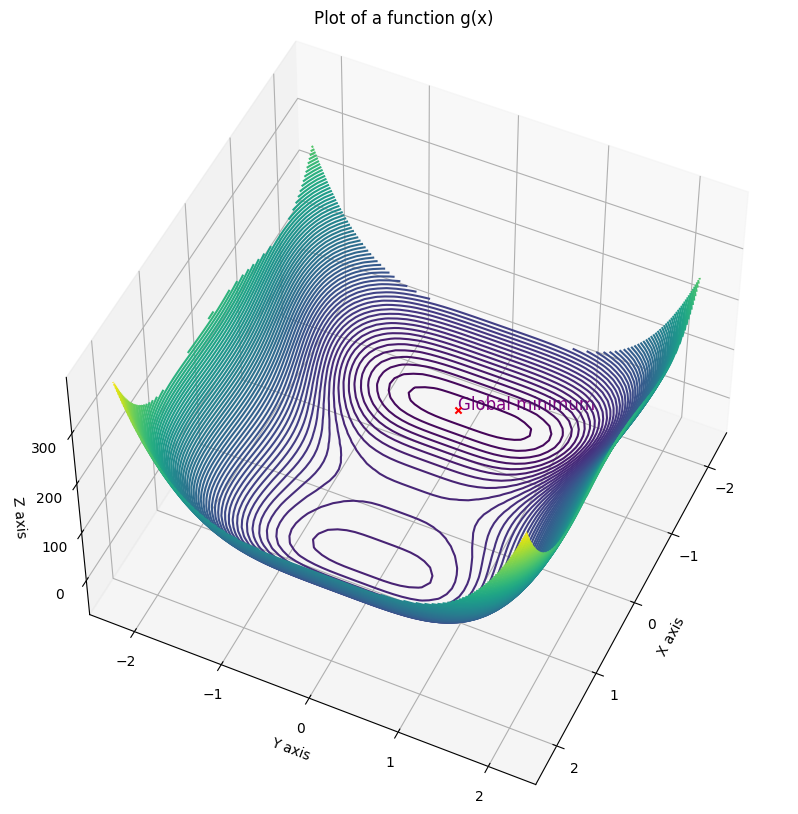

In [181]:
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.contour3D(x_values, y_values, z_values, 100, cmap='viridis')
ax1.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')


ax1.scatter(x_minimum_3d, y_minimum_3d, z_minimum_3d, marker="x", c="red")
ax1.text(x_minimum_3d, y_minimum_3d, z_minimum_3d, "Global minimum", color='purple', fontsize='large')
# ax2 = ax1.twinx()
ax1.view_init(50, 25)

plt.show()